# Single variable linear regression


Linear regression: Linear regression is used to identify the relationship between a dependent variable and one or more independent variables and is typically leveraged to make predictions about future outcomes. When there is only one independent variable and one dependent variable, it is known as simple linear regression. As the number of independent variables increases, it is referred to as multiple linear regression. For each type of linear regression, it seeks to plot a line of best fit, which is calculated through the method of least squares. However, unlike other regression models, this line is straight when plotted on a graph.

In [2]:
import pandas as pb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
data = pb.read_csv(r"E:\coding\CSV\Advertising.csv")

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


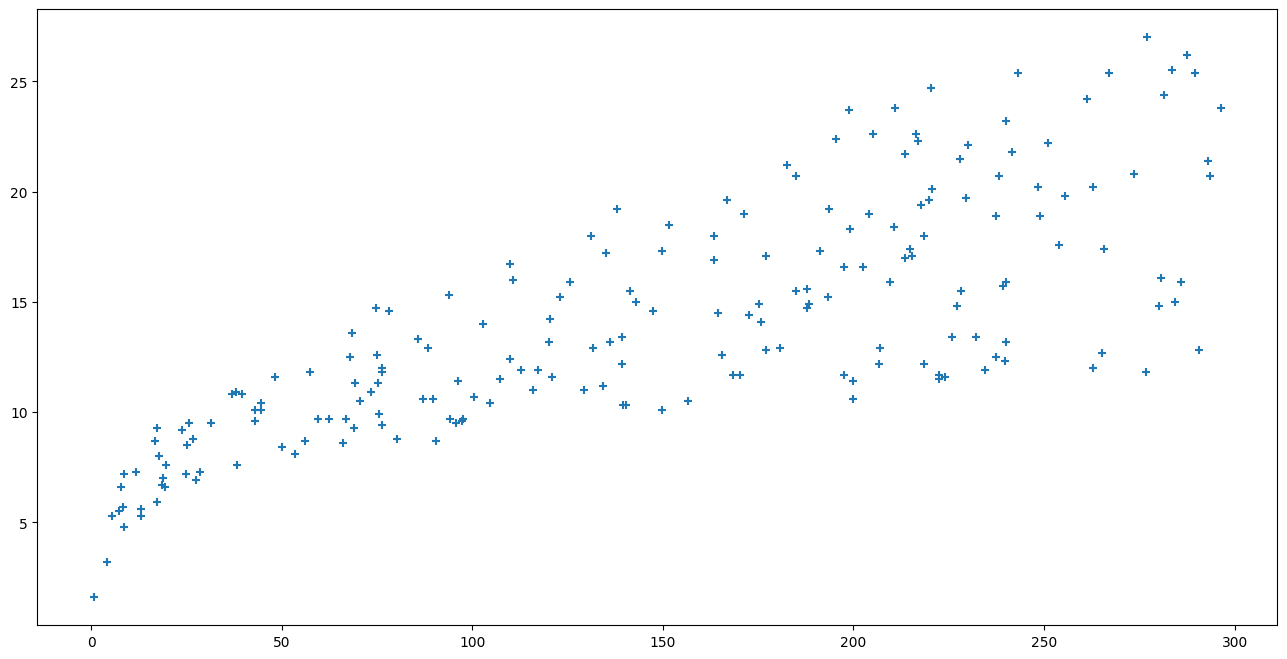

In [5]:
# visualise the data (x-axis = "TV", y-axis = "sales")
plt.figure(figsize=(16,8))
plt.scatter(data["TV"], data["sales"], marker="+")

In [6]:
# convert data in array
X = data["TV"].values.reshape(-1,1)
Y = data["sales"].values.reshape(-1,1)


In [7]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [8]:
predictions = reg.predict(X)

# y = mx + c
# x is indpendent variable
# y is dependent variable

print("coefficients:",reg.coef_)    # value of m
print("intercept:", reg.intercept_) # value 0f c



coefficients: [[0.04753664]]
intercept: [7.03259355]


Text(0, 0.5, 'Sales ($)')

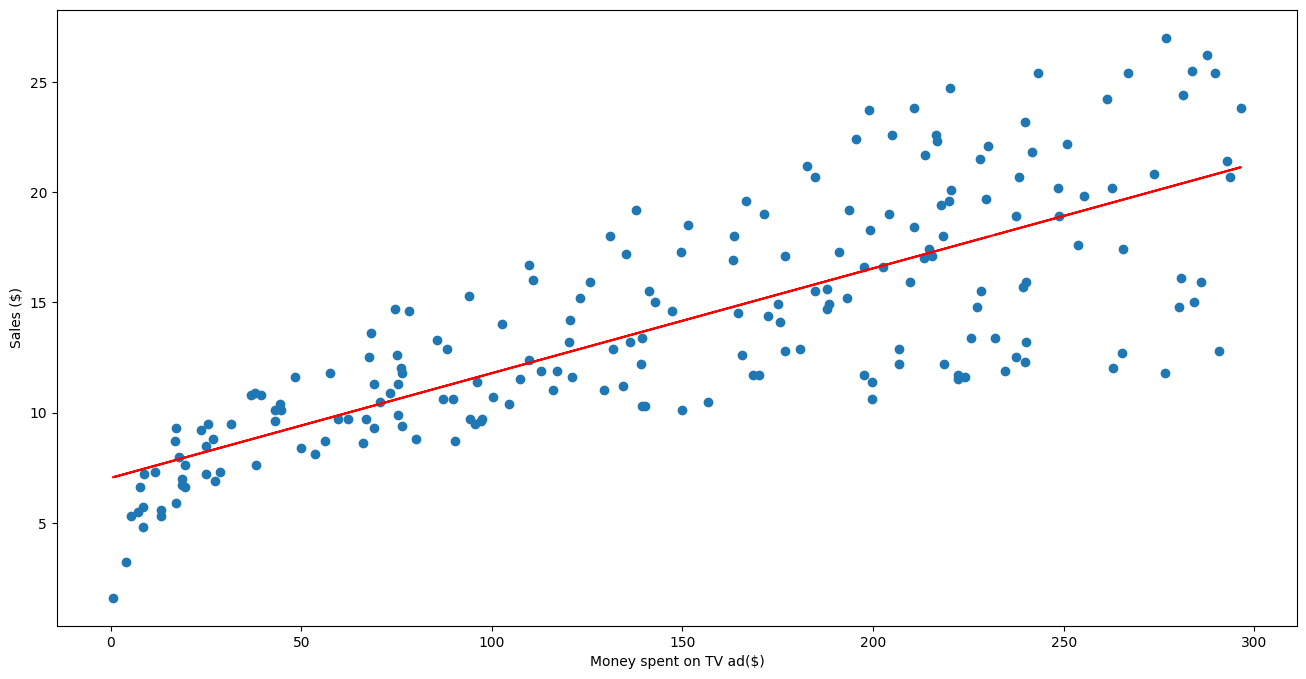

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(data["TV"], data["sales"])

plt.plot(data["TV"],predictions,color="red")
plt.xlabel("Money spent on TV ad($)")
plt.ylabel("Sales ($)")


In [10]:
# predicting y using value of x 
reg.predict([[225]])

array([[17.72833765]])

In [11]:
test = [[25],[30],[45],[65],[95],[125],[155],[175],[225],[275],[300],[325],[375]]
reg.predict(test)

array([[ 8.22100956],
       [ 8.45869276],
       [ 9.17174237],
       [10.12247518],
       [11.54857439],
       [12.9746736 ],
       [14.40077282],
       [15.35150562],
       [17.72833765],
       [20.10516967],
       [21.29358568],
       [22.48200169],
       [24.85883371]])

In [12]:
proto = np.random.rand(len(data)) < 0.8
train = data[proto]
test = data[~proto]

In [13]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  165 non-null    int64  
 1   TV          165 non-null    float64
 2   radio       165 non-null    float64
 3   newspaper   165 non-null    float64
 4   sales       165 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 4 to 198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35 non-null     int64  
 1   TV          35 non-null     float64
 2   radio       35 non-null     float64
 3   newspaper   35 non-null     float64
 4   sales       35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.6 KB


## training

In [14]:
train_x = train["TV"].values.reshape(-1,1)
train_y = train["sales"].values.reshape(-1,1)

In [15]:
reg.fit(train_x,train_y)

LinearRegression()

In [16]:
print("coefficients:",reg.coef_)    # value of m
print("intercept:", reg.intercept_) # value 0f c

coefficients: [[0.04695102]]
intercept: [7.07642749]


## testing

In [17]:
test_x = test["TV"].values.reshape(-1,1)
test_y = test["sales"].values.reshape(-1,1)


In [18]:
predicted_test_y = reg.predict(test_x)

In [19]:
reg.score(test_x,test_y)

0.6151152178863074

In [20]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted_test_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predicted_test_y) )

Mean absolute error: 2.81
Residual sum of squares (MSE): 11.38
R2-score: 0.62
